<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_49/toronto_shelters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages and data

**Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates

import matplotlib as mpl
from datetime import datetime
from datetime import timedelta
from matplotlib import dates

**Data**

In [14]:
# Read
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-12-01/shelters.csv')

# Inspect
df.head()

,id,occupancy_date,organization_name,shelter_name,shelter_address,shelter_city,shelter_province,shelter_postal_code,facility_name,program_name,sector,occupancy,capacity
0,1,2017-01-01T00:00:00,COSTI Immigrant Services,COSTI Reception Centre,100 Lippincott Street,Toronto,ON,M5S 2P1,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,16,16.0
1,2,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,13,17.0
2,3,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,63,63.0
3,4,2017-01-01T00:00:00,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Centre,43 Christie Street,Toronto,ON,M6G 3B1,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,66,70.0
4,5,2017-01-01T00:00:00,City of Toronto,Birchmount Residence,1673 Kingston Road,Toronto,ON,NaN,Birchmount Res 1673 Kingston Rd,Birchmount Residence,Men,58,60.0


# Wrangle

**Date wrangling, caculate what percent of capacity was occupied every day, prepare data for heat map**

In [3]:
#  Convert occupancy date to datetime
df['occupancy_date'] = pd.to_datetime(df['occupancy_date'])

# Groupby date to find the total occupancy and capacity each day
df_grouped = df.groupby(df['occupancy_date']).sum().reset_index()

# Calculate occupancy / capacity every day
df_grouped['percent_full'] = df_grouped['occupancy']/df_grouped['capacity']

# We need this an array to make a heat map
perc_array = df_grouped['percent_full'].values

# Stack the array ontop of itself for the heat map
stack = np.stack((perc_array, perc_array))

# Min and max dates for heat map. Extend into 2020 to get the rightmost x-tick to read 2020
# Use mpl.dates.date2num to convert datetime object to numeric
# Need this to be numeric for use in plt.imshow
min_date = mpl.dates.date2num(datetime(2017, 1, 1))
max_date = mpl.dates.date2num(datetime(2020, 1, 1))

**Two quick questions...**


1.   How many shelter programs are there in Toronto?
2.   How many shelter locations are there in Toronto?


In [25]:
# Assuming program name is a unique identifier for each program
unique_programs = df['program_name'].unique()
num_programs = len(unique_programs)

# Assuming shelter address ia a unique identifier for shelter location
unique_locations = df['shelter_address'].unique()
num_locations = len(unique_locations)

# Answers
print('There are ' + str(num_programs) + ' shelter programs in Toronto')
print('There are ' + str(num_locations) + ' shelter locations in Toronto')

There are 155 shelter programs in Toronto
There are 65 shelter locations in Toronto


# Plotting

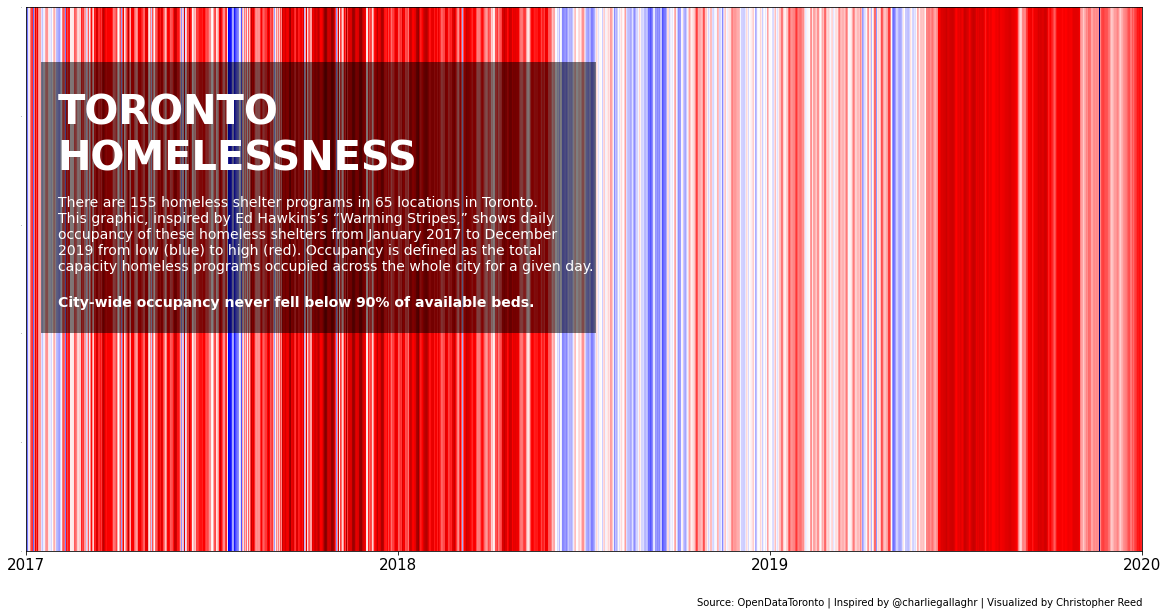

In [35]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (20, 10))

#############
##MAIN PLOT##
#############

# Create a heat map using the stacked array and min/max date
ax.imshow(stack,
          extent=[min_date, max_date, 0,1],
          cmap = 'seismic',
          aspect = 'auto')

###########################
##MASSAGE X AXIS TO DATES##
###########################

# Tell ax that the x axis should be a date
# Use YearLocator() to place one tick at the start of each year.
# Format that one tick per year to be just the year (%Y)
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

###################
##TEXT COMPONENTS##
###################

##NOTE: All x-axis values must be given as datetime objects! Use timedelta() to "add" dates.

# Main title
ax.text(x = datetime(2017, 2, 1),
        y = 0.70,
        s = 'TORONTO\nHOMELESSNESS',
        fontsize = 40,
        weight = 'bold',
        color = 'white')

# Description
ax.text(x = datetime(2017, 2, 1),
        y = 0.485,
        s = """
There are 155 homeless shelter programs in 65 locations in Toronto.
This graphic, inspired by Ed Hawkins’s “Warming Stripes,” shows daily
occupancy of these homeless shelters from January 2017 to December
2019 from low (blue) to high (red). Occupancy is defined as the total
capacity homeless programs occupied across the whole city for a given day.
        """,
        fontsize = 14,
        color = 'white')

# Bold text
ax.text(x = datetime(2017, 2, 1),
        y = 0.45,
        s = 'City-wide occupancy never fell below 90% of available beds.',
        color = 'white',
        fontsize = 14,
        weight = 'bold')

#############
##RECTANGLE##
#############

# Make rectangle
rect = patches.Rectangle((datetime(2017, 1, 15), 0.4),
                         timedelta(days = 545), 0.5,
                         linewidth = 0,
                         edgecolor = 'black',
                         facecolor = 'black',
                         alpha = 0.5)

# Add the rectangle
ax.add_patch(rect)

###############
##TICK PARAMS##
###############

ax.tick_params(axis = 'y',
               length = 0,
               labelsize = 0)

ax.tick_params(axis = 'x',
               labelsize = 15)

###########
##CREDITS##
###########

ax.text(x = datetime(2020, 1, 1),
        y = -0.1,
        s = 'Source: OpenDataToronto | Inspired by @charliegallaghr | Visualized by Christopher Reed',
        ha = 'right')

########
##SAVE##
########

plt.savefig('toronto_shelters.jpg',
            bbox_inches = 'tight')